In [1]:
# Uncomment the following lines if you need to install the required packages

# !pip install prophet
# !pip install ipywidgets
# !pip install plotly

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Importing the sales data
df_sales = pd.read_csv('sales_data.csv')
df_sales

,Category,Product,Code,Size,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,...,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24,Jan-25,Feb-25,Mar-25,Apr-25,May-25
0,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -100,100,6.0,7.0,1.0,NaN,1.0,2.0,...,2.0,NaN,2.0,NaN,NaN,5.0,7.0,1.0,3.0,2.0
1,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -104,104,5.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,13.0,1.0,1.0,1.0,2.0
2,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -108,108,1.0,1.0,2.0,2.0,3.0,NaN,...,1.0,NaN,NaN,NaN,NaN,7.0,3.0,NaN,2.0,3.0
3,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -112,112,4.0,6.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,2.0,2.0
4,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -116,116,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -84,84,8.0,6.0,1.0,1.0,4.0,1.0,...,4.0,NaN,1.0,NaN,NaN,13.0,6.0,0.0,2.0,3.0
481,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -88,88,7.0,3.0,1.0,NaN,4.0,2.0,...,1.0,0.0,NaN,NaN,1.0,7.0,6.0,1.0,1.0,NaN
482,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -92,92,6.0,6.0,1.0,2.0,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,9.0,1.0,2.0,2.0,3.0
483,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -96,96,4.0,1.0,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,1.0,NaN,6.0,5.0,2.0,NaN,2.0


# Data Cleaning

In [ ]:
# Removing the 'Grand Total' category from the sales data
df_sales = df_sales[df_sales['Category'] != 'Grand Total']
df_sales

,Category,Product,Code,Size,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,...,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24,Jan-25,Feb-25,Mar-25,Apr-25,May-25
0,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -100,100,6.0,7.0,1.0,NaN,1.0,2.0,...,2.0,NaN,2.0,NaN,NaN,5.0,7.0,1.0,3.0,2.0
1,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -104,104,5.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,13.0,1.0,1.0,1.0,2.0
2,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -108,108,1.0,1.0,2.0,2.0,3.0,NaN,...,1.0,NaN,NaN,NaN,NaN,7.0,3.0,NaN,2.0,3.0
3,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -112,112,4.0,6.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,2.0,2.0
4,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -116,116,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -80,80,5.0,8.0,2.0,1.0,2.0,3.0,...,3.0,NaN,1.0,NaN,NaN,7.0,1.0,1.0,2.0,5.0
480,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -84,84,8.0,6.0,1.0,1.0,4.0,1.0,...,4.0,NaN,1.0,NaN,NaN,13.0,6.0,0.0,2.0,3.0
481,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -88,88,7.0,3.0,1.0,NaN,4.0,2.0,...,1.0,0.0,NaN,NaN,1.0,7.0,6.0,1.0,1.0,NaN
482,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -92,92,6.0,6.0,1.0,2.0,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,9.0,1.0,2.0,2.0,3.0


In [ ]:
# Displaying the columns of the sales DataFrame
df_sales.columns

Index(['Category', 'Product', 'Code', 'Size', 'Jan-22', 'Feb-22', 'Mar-22',
       'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22',
       'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23',
       'Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 'Oct-23', 'Nov-23', 'Dec-23',
       'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24',
       'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24', 'Jan-25', 'Feb-25',
       'Mar-25', 'Apr-25', 'May-25'],
      dtype='object')

##### Missing/Null Values

In [6]:
#Checking for null/missing values
total = df_sales.isnull().sum().sort_values(ascending=False)
percent = (df_sales.isnull().sum()/df_sales.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Dec-22,438,0.904959
Oct-22,434,0.896694
Nov-23,430,0.888430
Sep-23,429,0.886364
Nov-22,427,0.882231
Sep-22,416,0.859504
Apr-23,410,0.847107
Apr-22,405,0.836777
Jul-22,402,0.830579
Mar-22,395,0.816116


##### Under the assumption that missing values correspond to 0 sales, we will be imputing 0 for the missing entries

In [ ]:
# Assuming the missing values are 0 sales
df_sales = df_sales.fillna(0)
#Checking for null/missing values
total = df_sales.isnull().sum().sort_values(ascending=False)
percent = (df_sales.isnull().sum()/df_sales.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Category,0,0.0
Product,0,0.0
Code,0,0.0
Size,0,0.0
Jan-22,0,0.0


## Data Aggregation

In [ ]:
# Melting the dataframe to long format for time series modeling
df_sales = df_sales.melt(
    id_vars=['Category', 'Product', 'Code', 'Size'],
    var_name='Month',
    value_name='Sales'
)

# Convert 'Month' to datetime
df_sales['Month'] = pd.to_datetime(df_sales['Month'], format='%b-%y')
df_sales

,Category,Product,Code,Size,Month,Sales
0,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -100,100,2022-01-01,6.0
1,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -104,104,2022-01-01,5.0
2,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -108,108,2022-01-01,1.0
3,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -112,112,2022-01-01,4.0
4,Alfriston College,ALF Boys Ink Trousers,US PT 703L ALF -116,116,2022-01-01,0.0
...,...,...,...,...,...,...
19839,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -80,80,2025-05-01,5.0
19840,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -84,84,2025-05-01,3.0
19841,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -88,88,2025-05-01,0.0
19842,Western Heights High,WHHS Snr Trouser,US PT 703L WHHS -92,92,2025-05-01,3.0


In [ ]:
# Aggregating the sales by Size
df_sales_size = df_sales.groupby(['Size'])['Sales'].sum().reset_index()
df_sales_size

,Size,Sales
0,0,143.0
1,10,2284.0
2,100,329.0
3,102,48.0
4,102cm,1.0
...,...,...
95,XL,1291.0
96,XL/107,312.0
97,XS,1166.0
98,XS/87,80.0


In [ ]:
# Aggregating the sales by Product
df_sales_product = df_sales.groupby(['Product'])['Sales'].sum().reset_index()
df_sales_product.head()

,Product,Sales
0,ALF Boys Ink Trousers,1518.0
1,ALF Jacket,1128.0
2,ALF Jnr Blouse,1371.0
3,ALF Jnr Shirt,1633.0
4,ALF Long Skirt,1069.0


In [ ]:
# Aggregating the sales by Date (monthly)
df_sales_date = df_sales.groupby(['Month'])['Sales'].sum().reset_index()
df_sales_date.head()

,Month,Sales
0,2022-01-01,2729.0
1,2022-02-01,1327.0
2,2022-03-01,160.0
3,2022-04-01,218.0
4,2022-05-01,523.0


In [ ]:
# Aggregate sales by Product, Size, and Date (Monthly)
df = df_sales.groupby(['Product', 'Size', 'Month'])['Sales'].sum().reset_index()
# Saving the dataframe for forecasting
df.to_csv('sales_aggregated.csv', index=False)
df

,Product,Size,Month,Sales
0,ALF Boys Ink Trousers,100,2022-01-01,6.0
1,ALF Boys Ink Trousers,100,2022-02-01,7.0
2,ALF Boys Ink Trousers,100,2022-03-01,1.0
3,ALF Boys Ink Trousers,100,2022-04-01,0.0
4,ALF Boys Ink Trousers,100,2022-05-01,1.0
...,...,...,...,...
19839,WHHS Snr Trouser,96,2025-01-01,6.0
19840,WHHS Snr Trouser,96,2025-02-01,5.0
19841,WHHS Snr Trouser,96,2025-03-01,2.0
19842,WHHS Snr Trouser,96,2025-04-01,0.0


---

## Exploratory Data Analysis

In [ ]:
# Displaying the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19844 entries, 0 to 19843
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Product  19844 non-null  object        
 1   Size     19844 non-null  object        
 2   Month    19844 non-null  datetime64[ns]
 3   Sales    19844 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 620.3+ KB


In [ ]:
# Checking for null/missing values in the aggregated DataFrame
pd.isnull(df).sum()

Product    0
Size       0
Month      0
Sales      0
dtype: int64

In [ ]:
# Displaying the descriptive statistics of the DataFrame
df.describe()

,Month,Sales
count,19844,19844.000000
mean,2023-08-31 21:39:30.731707392,1.810018
min,2022-01-01 00:00:00,-5.000000
25%,2022-11-01 00:00:00,0.000000
50%,2023-09-01 00:00:00,0.000000
75%,2024-07-01 00:00:00,1.000000
max,2025-05-01 00:00:00,207.000000
std,NaN,6.759017


---

##### Outliers

In [26]:
# Detecting outliers using the IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Display the outliers
print("Outliers:")
outliers

Outliers:


,Product,Size,Month,Sales
0,ALF Boys Ink Trousers,100,2022-01-01,6.0
1,ALF Boys Ink Trousers,100,2022-02-01,7.0
12,ALF Boys Ink Trousers,100,2023-01-01,8.0
13,ALF Boys Ink Trousers,100,2023-02-01,6.0
14,ALF Boys Ink Trousers,100,2023-03-01,4.0
...,...,...,...,...
19802,WHHS Snr Trouser,92,2025-05-01,3.0
19803,WHHS Snr Trouser,96,2022-01-01,4.0
19815,WHHS Snr Trouser,96,2023-01-01,6.0
19839,WHHS Snr Trouser,96,2025-01-01,6.0


##### Since we are using Prophet (By Meta) for forecasting, we will be keeping these outliers as Prophet handles seasonality and extreme values well in comparison to other time-series models

---

#### Visualising the counts of each unique product

40


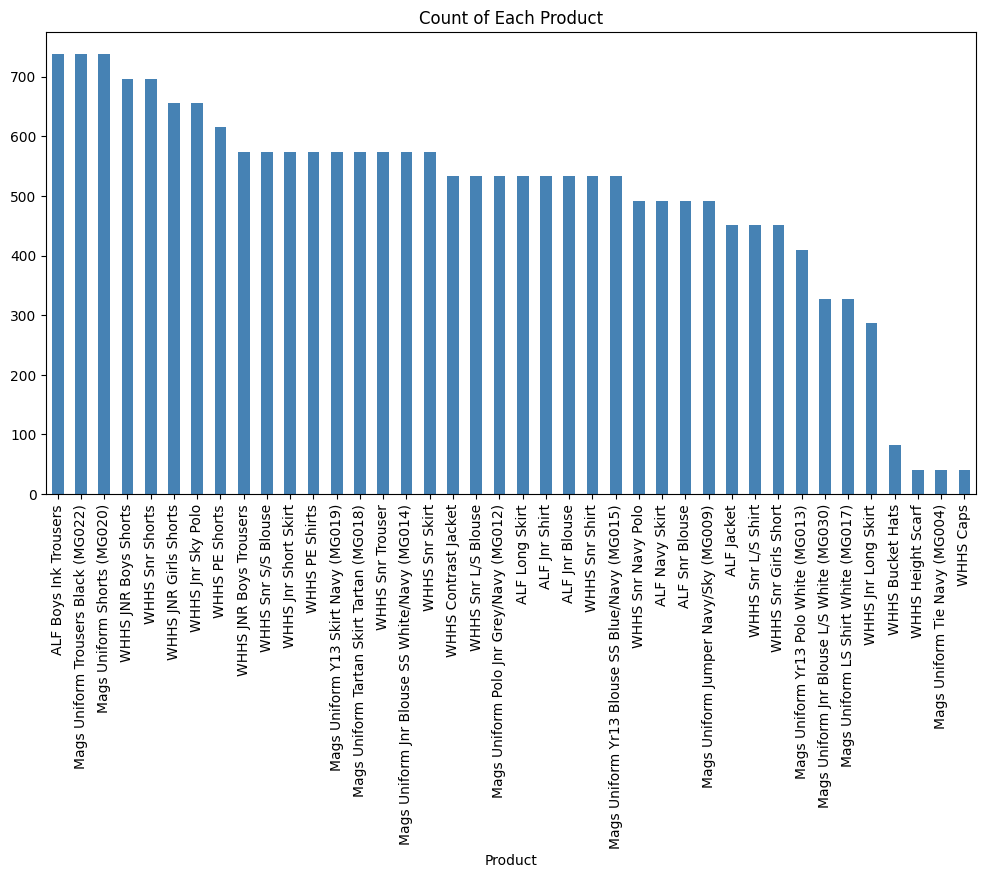

In [17]:
# Number of unique products
print(df['Product'].nunique())
# Plotting the count of each product
df['Product'].value_counts().plot(kind='bar', figsize=(12, 6), color='steelblue')
plt.title('Count of Each Product')
plt.show()

##### Visualising the sales for each product every month

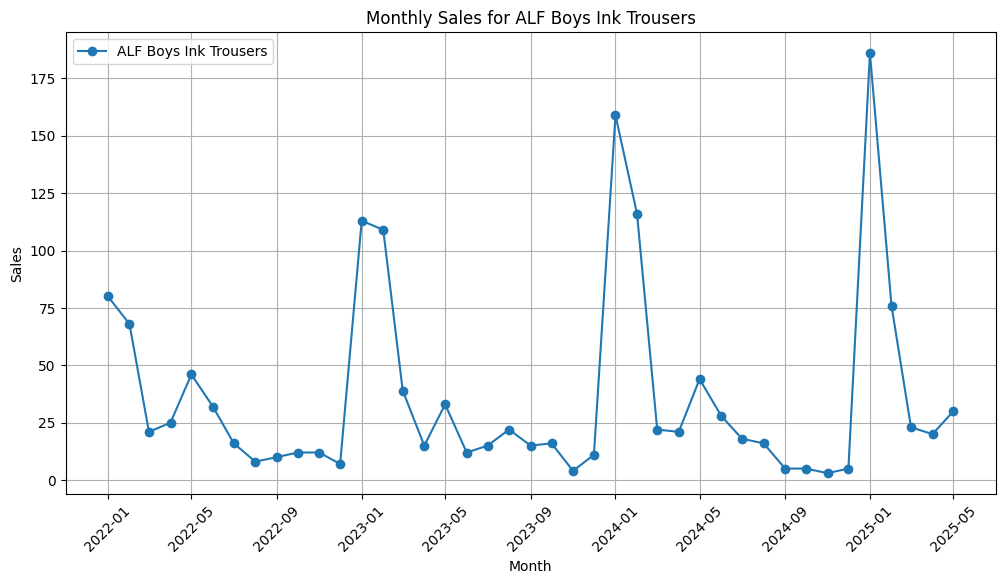

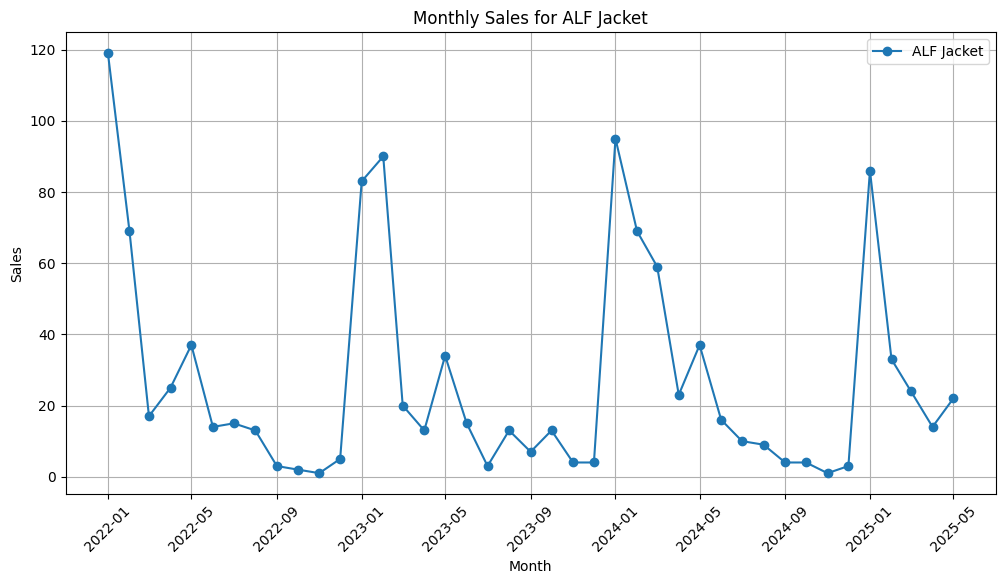

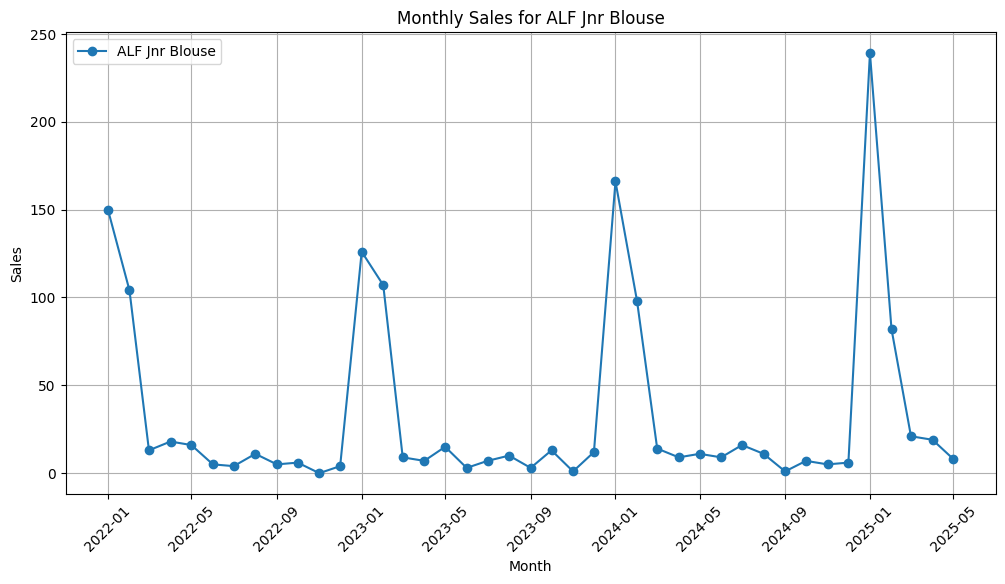

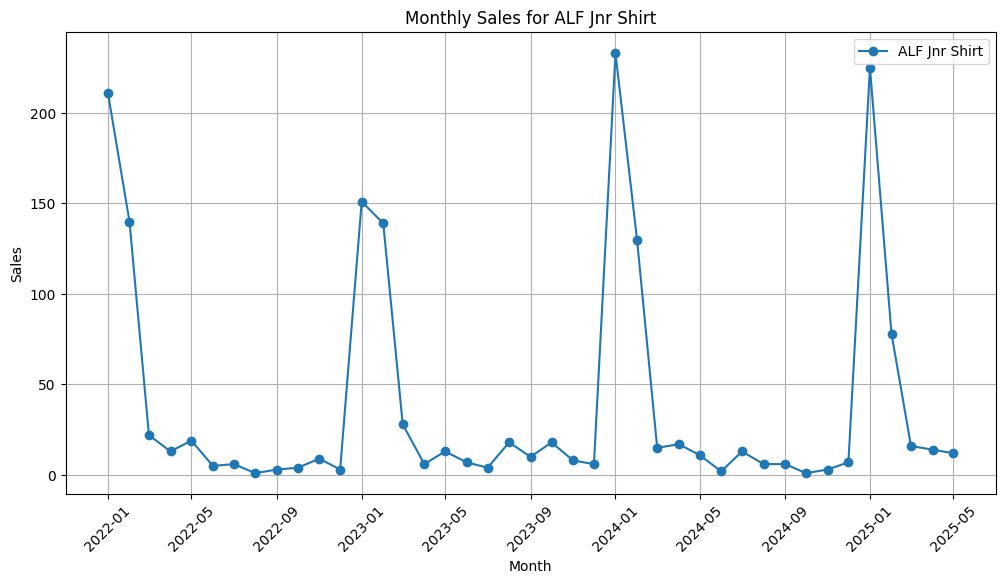

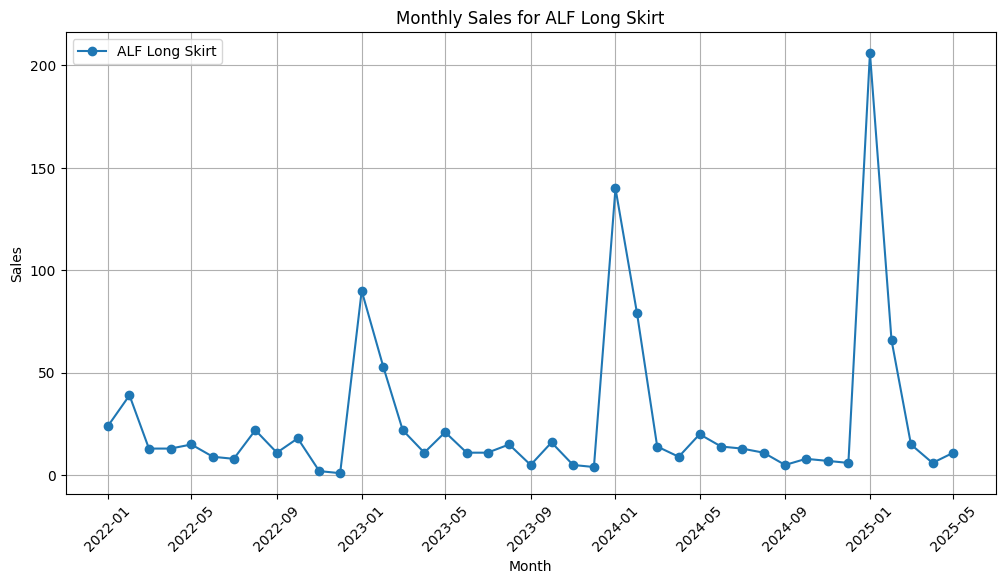

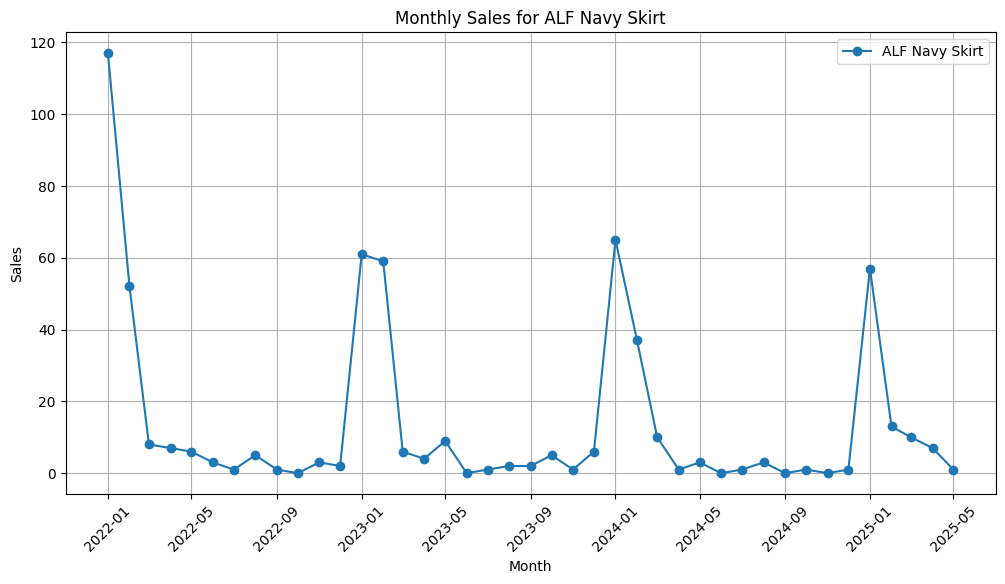

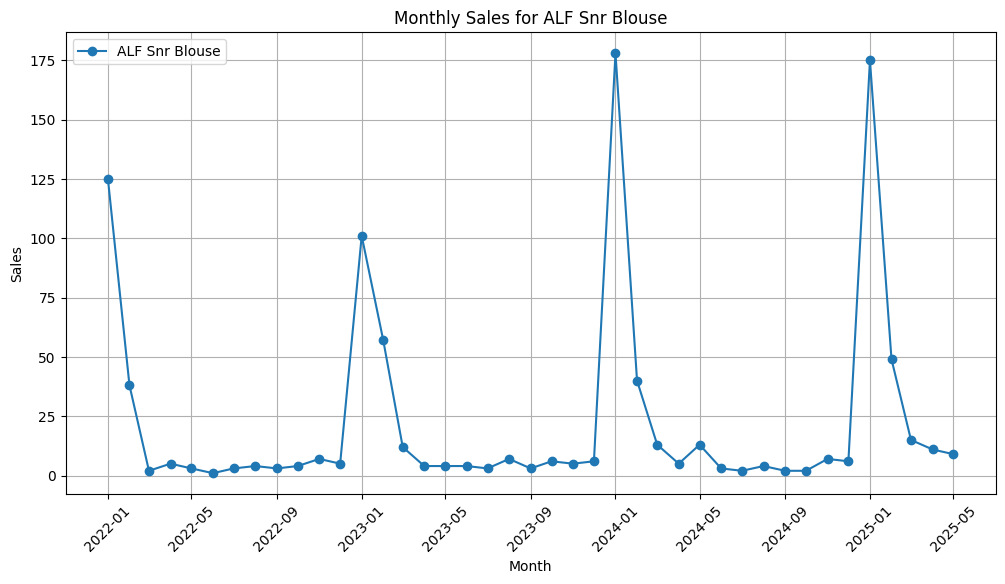

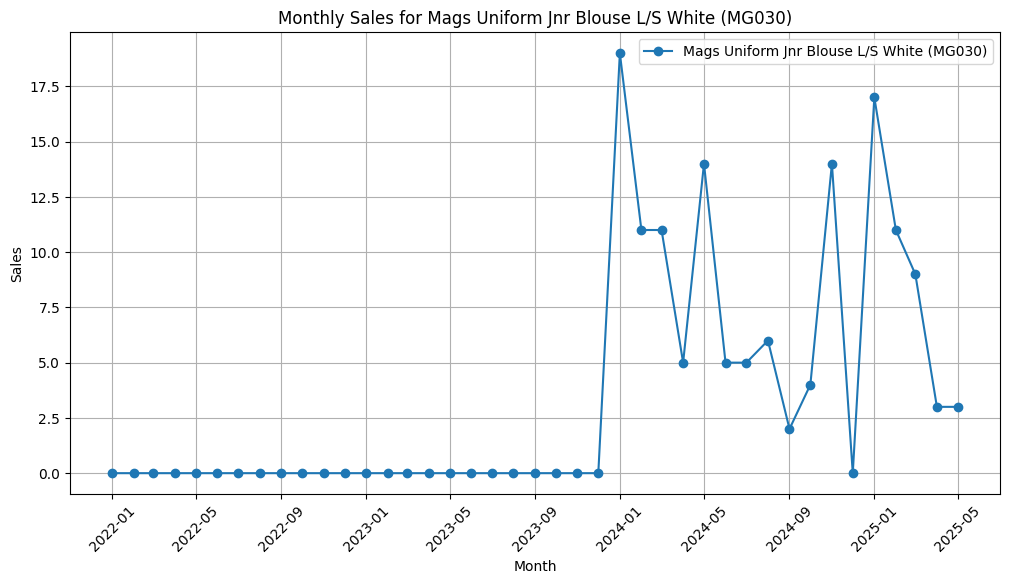

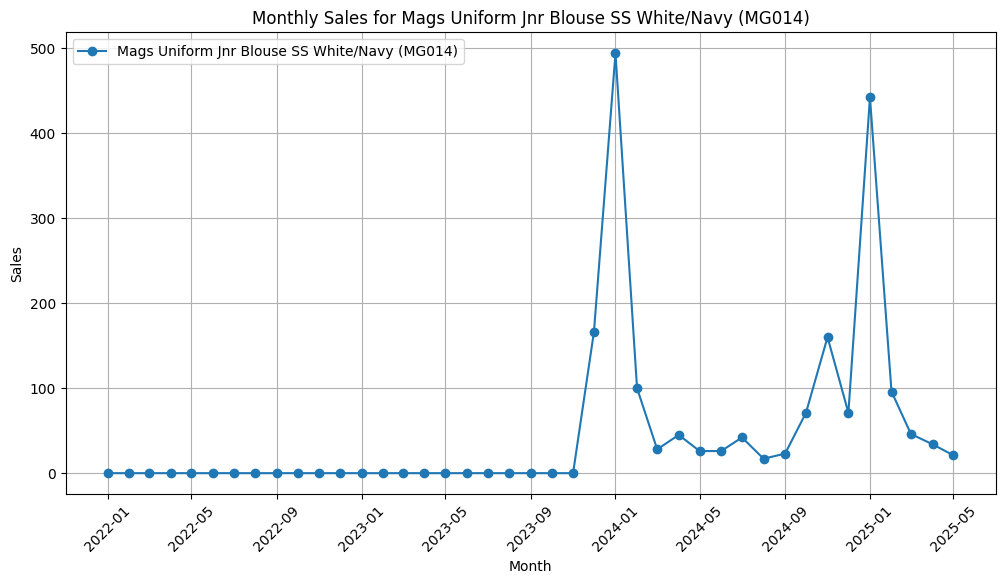

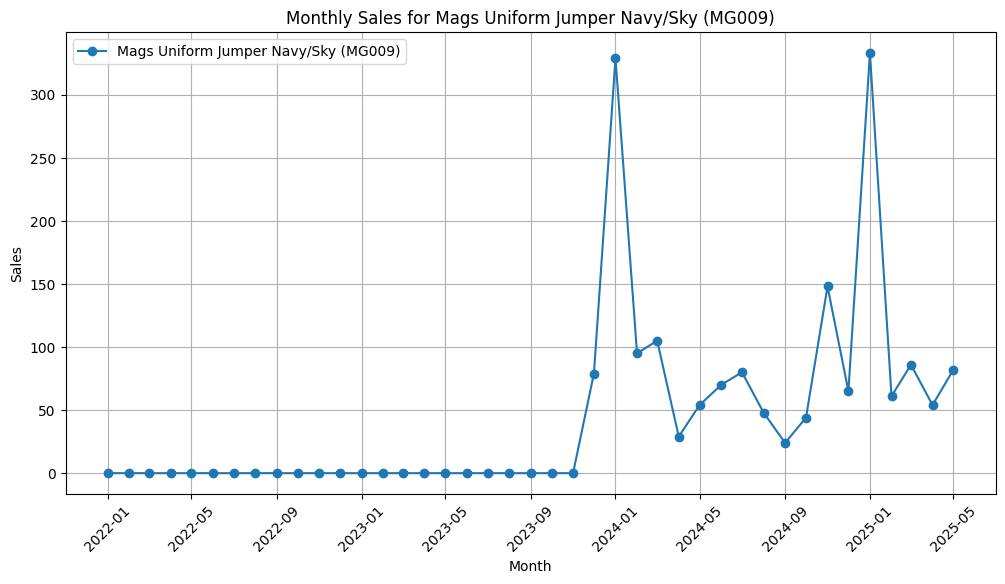

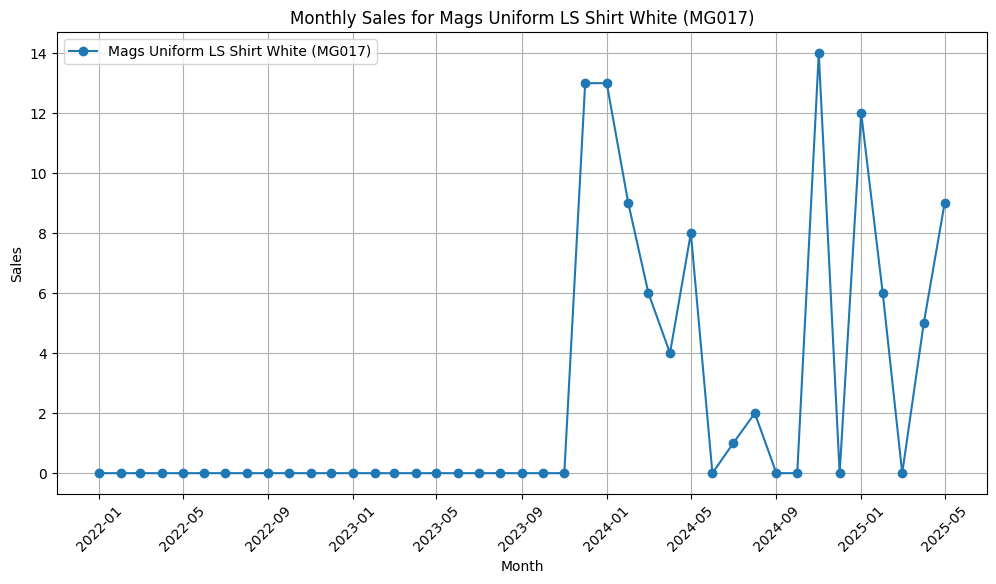

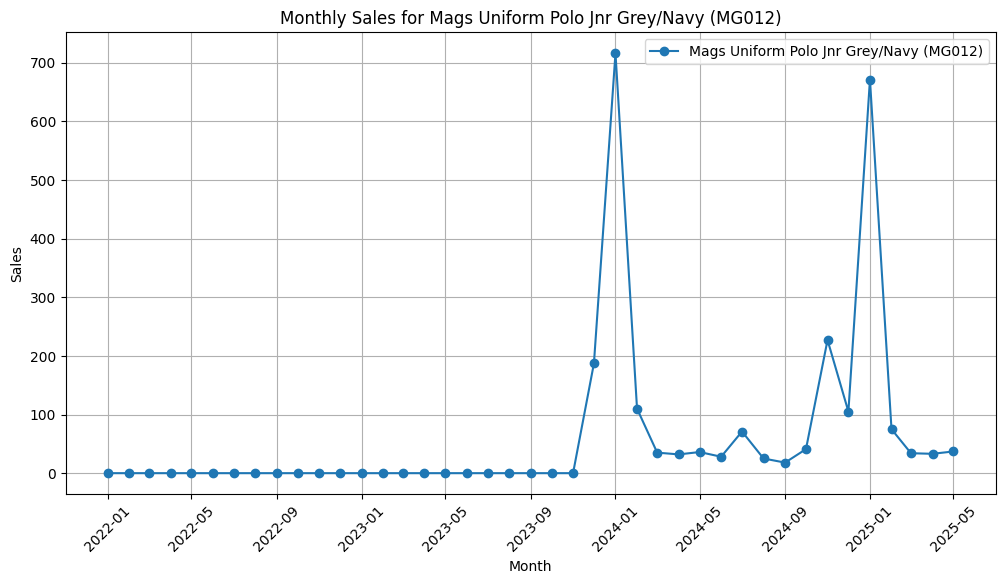

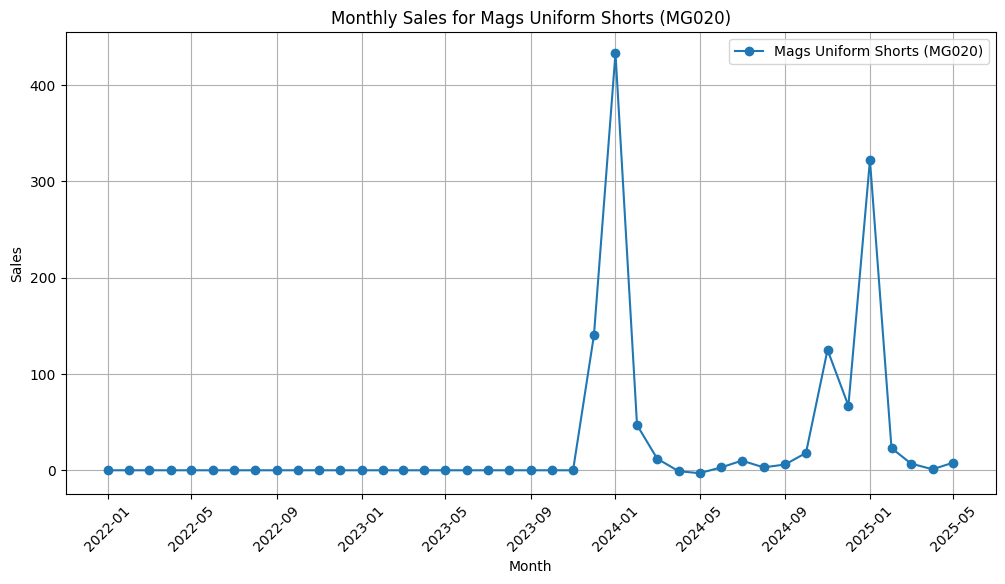

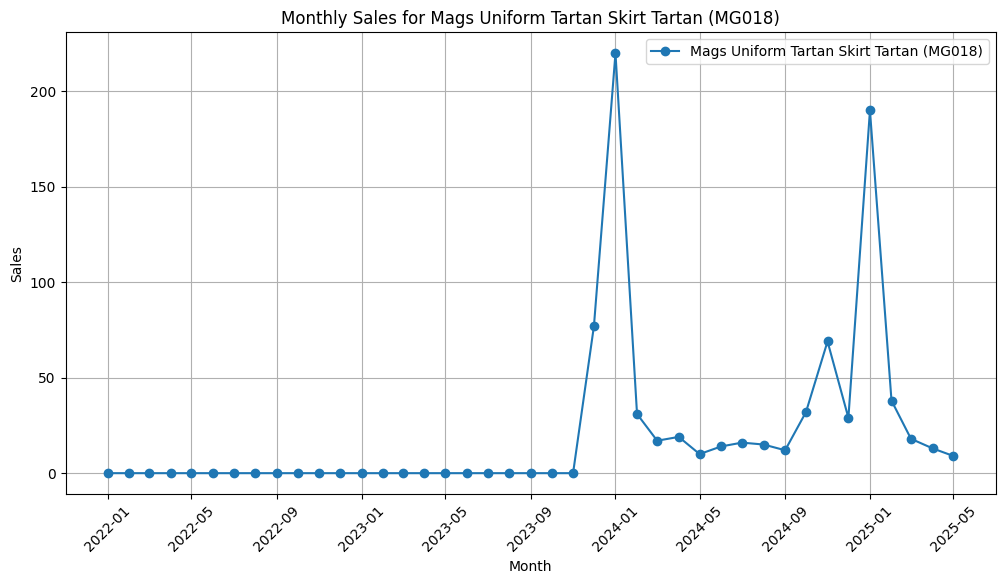

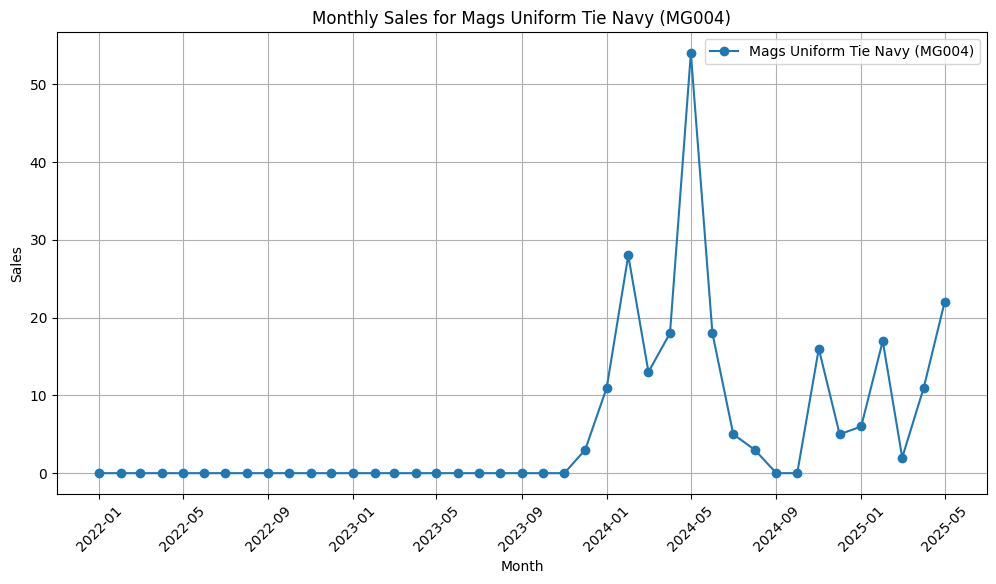

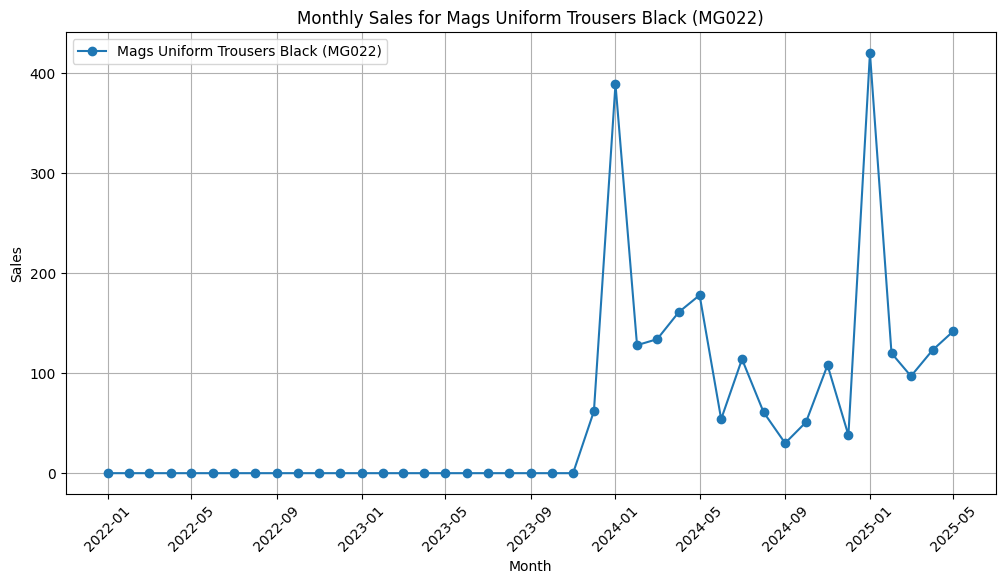

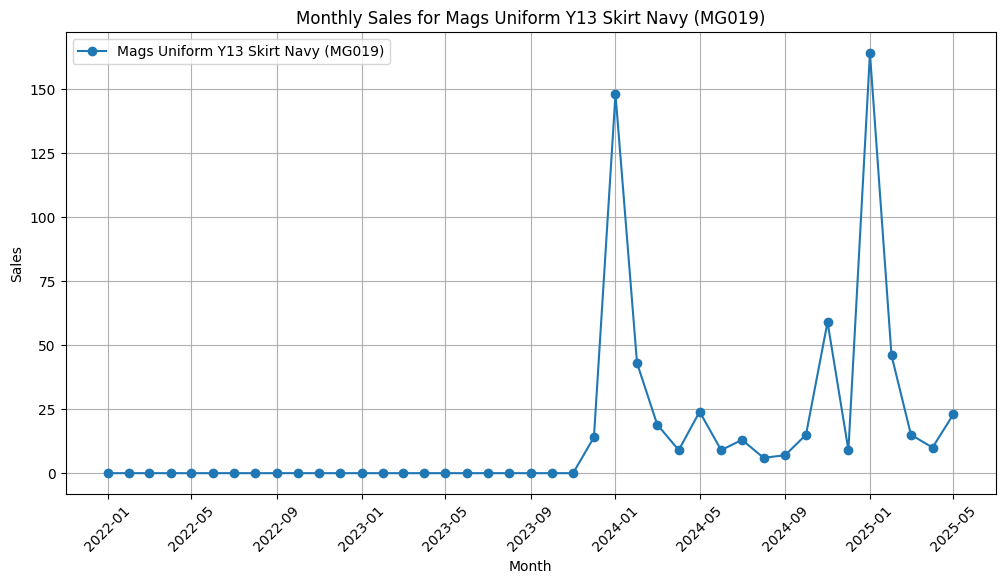

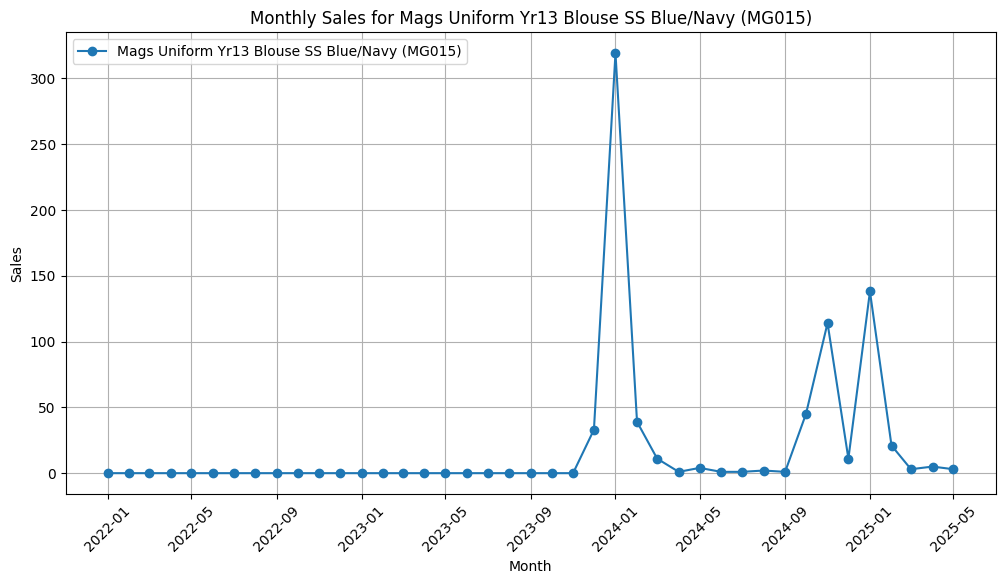

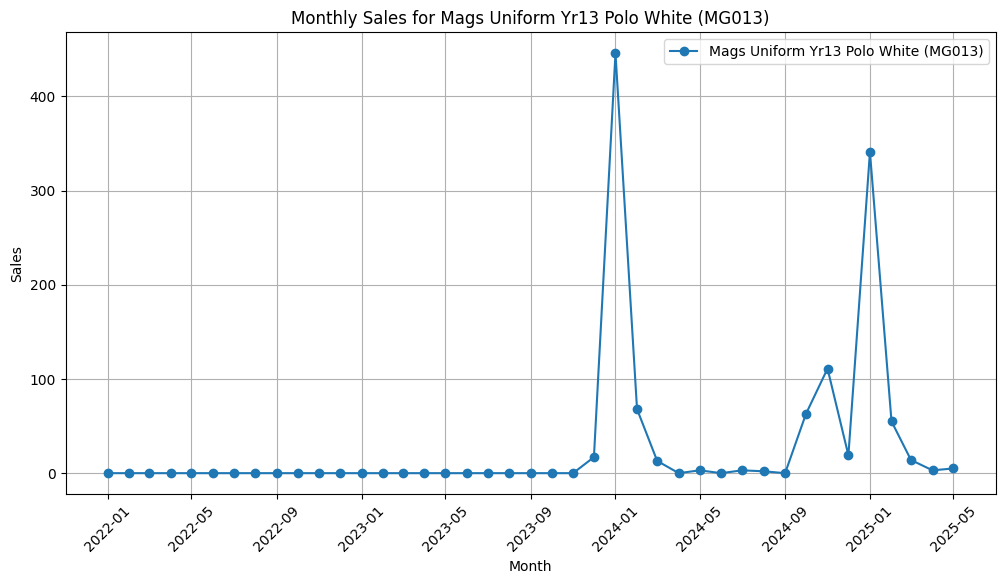

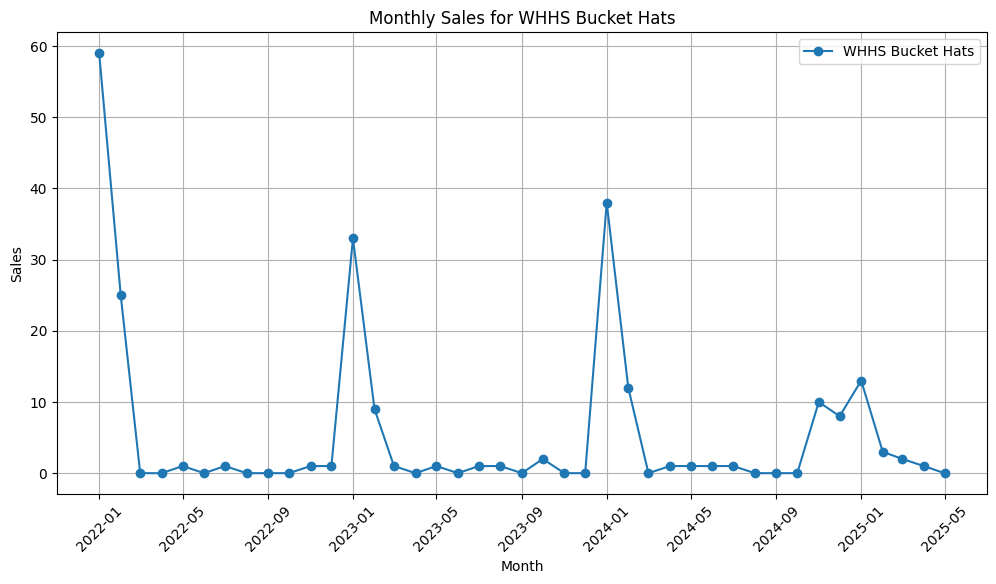

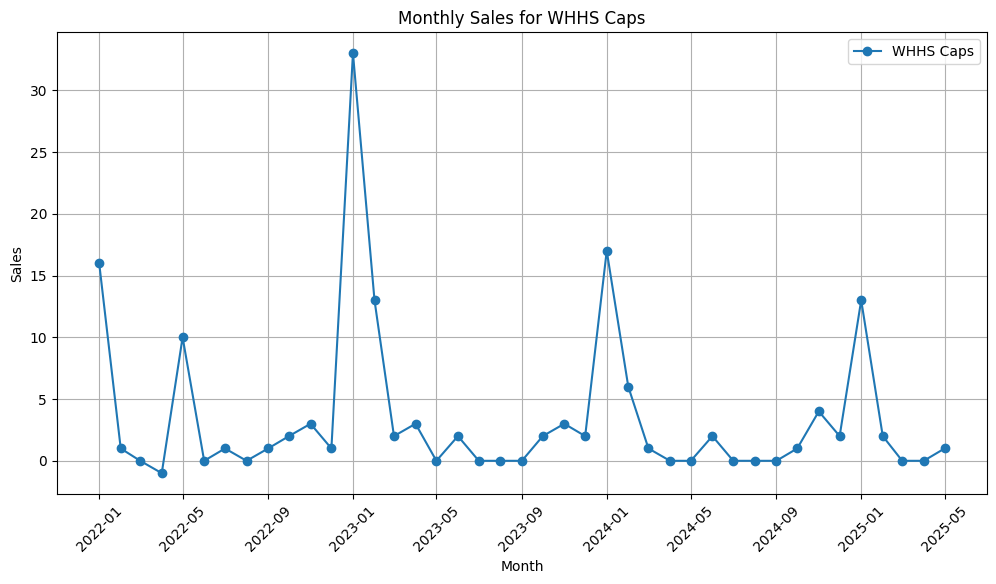

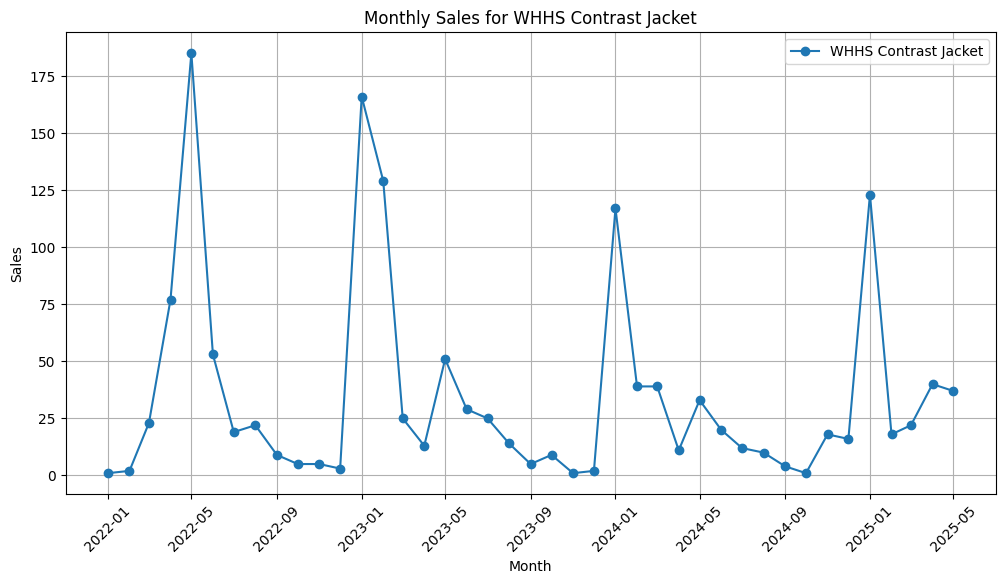

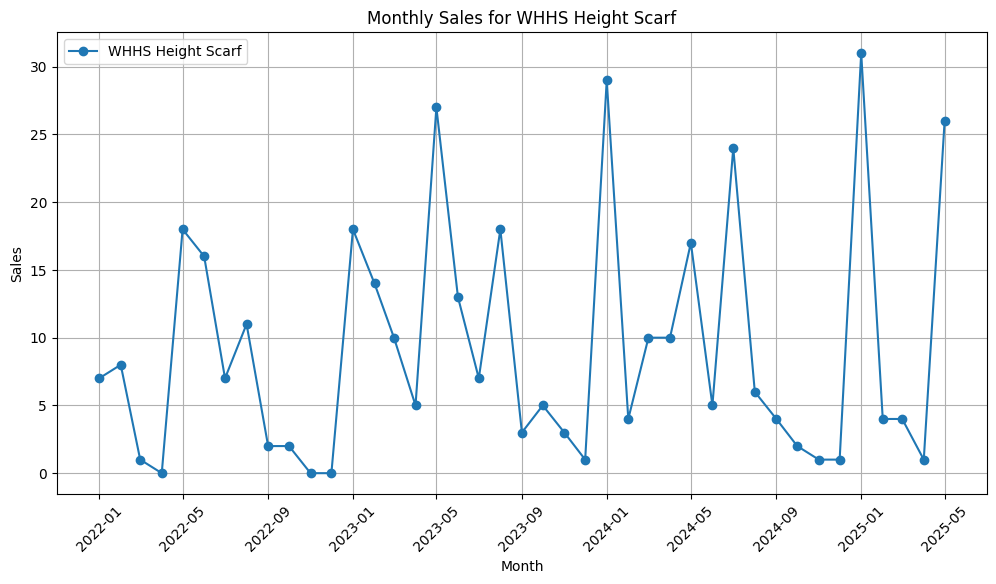

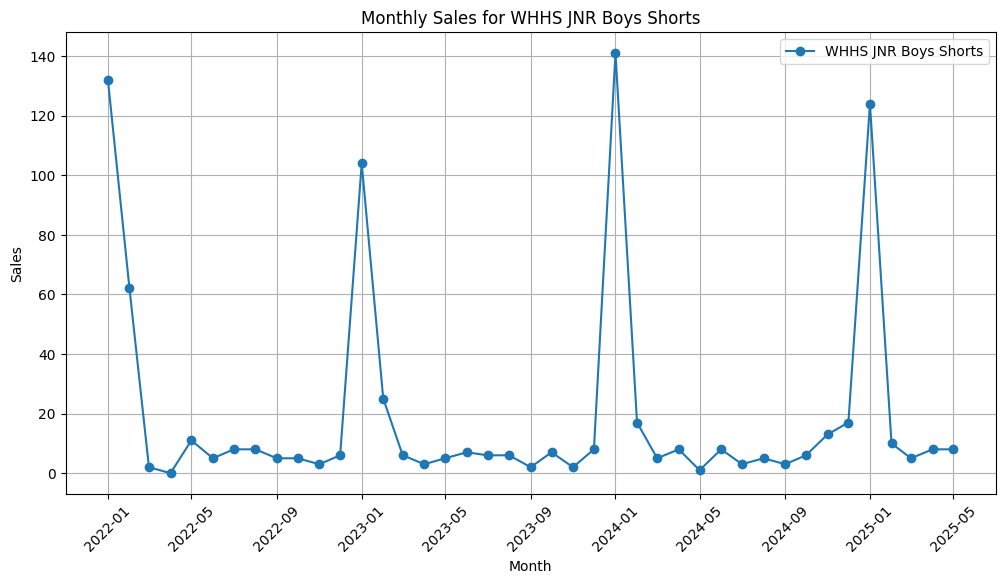

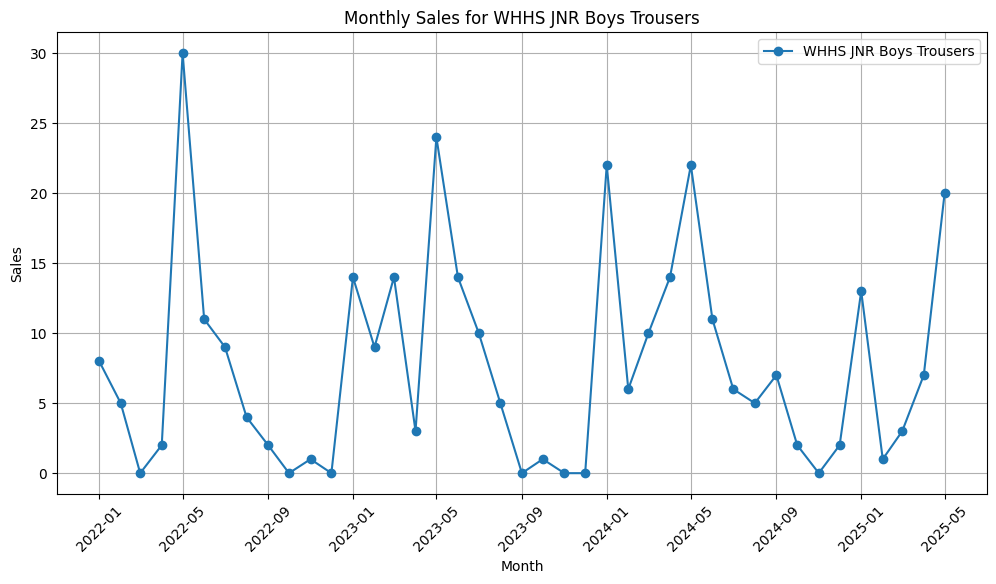

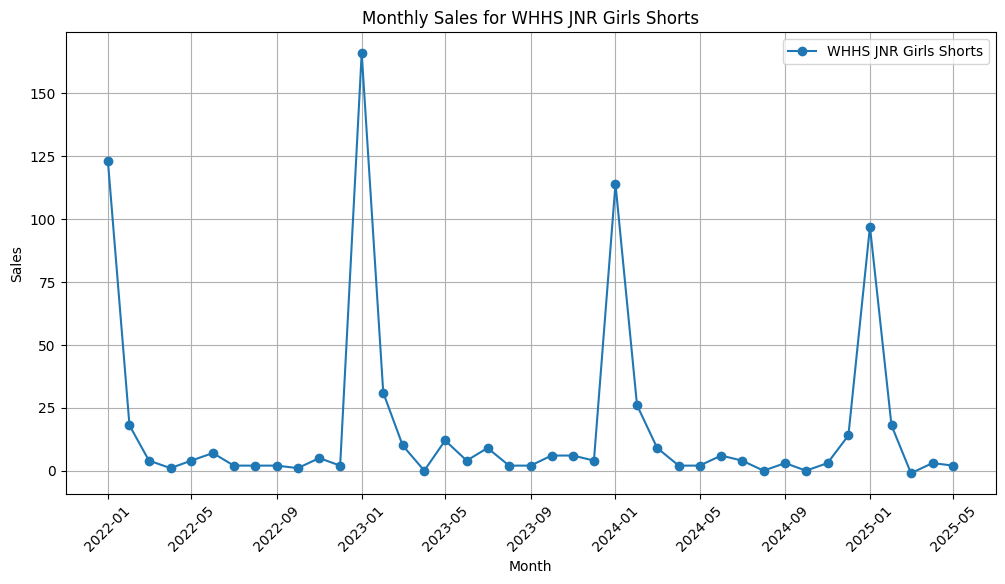

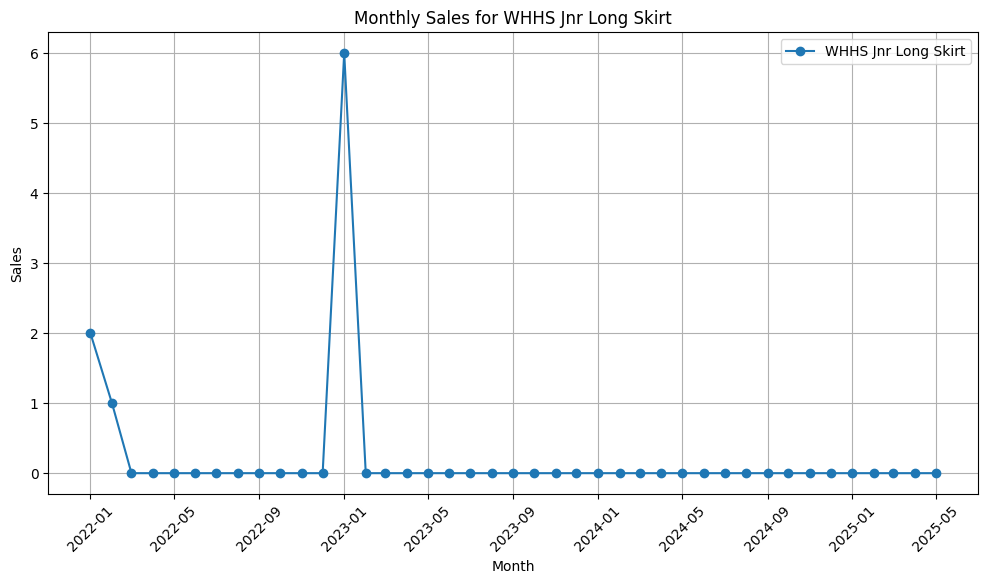

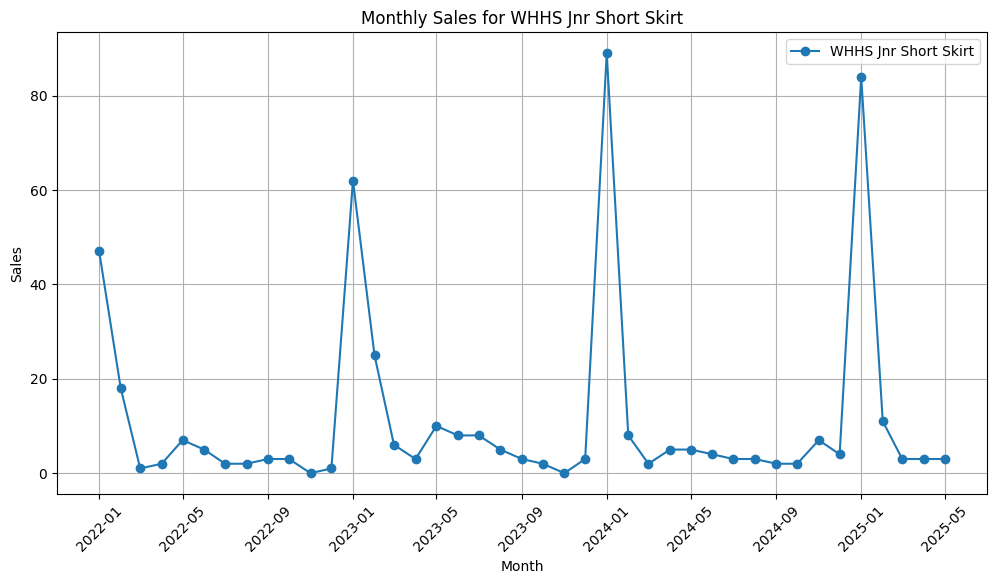

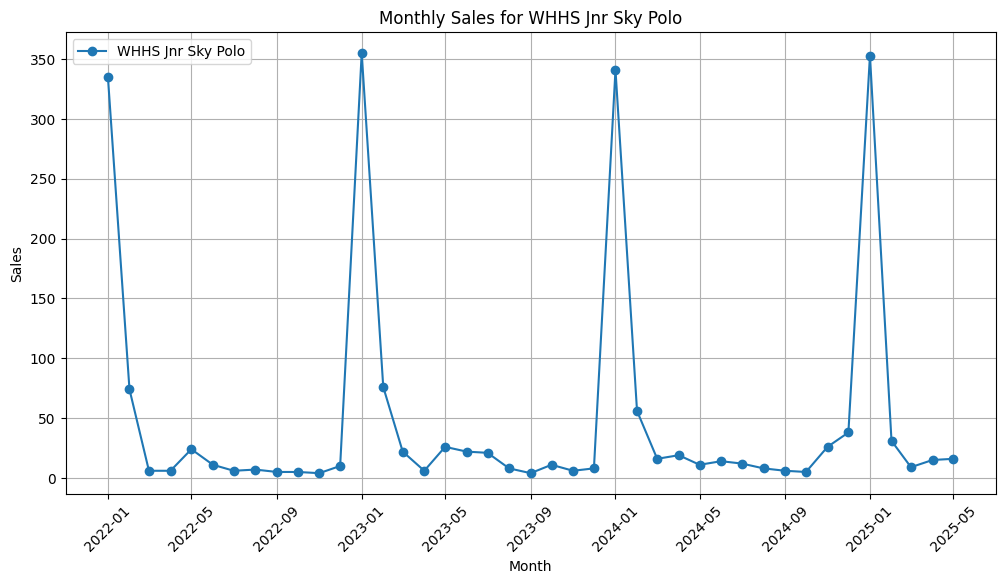

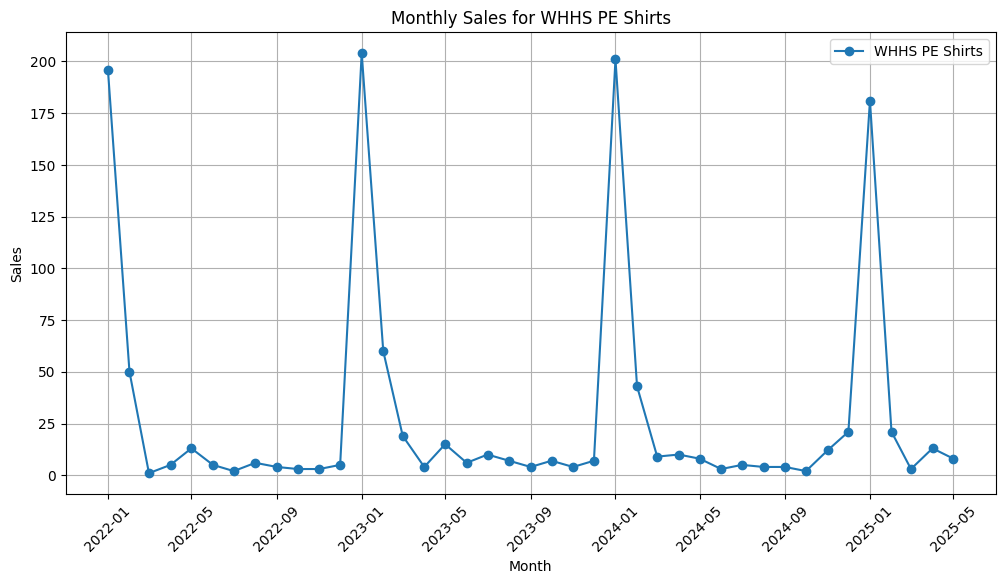

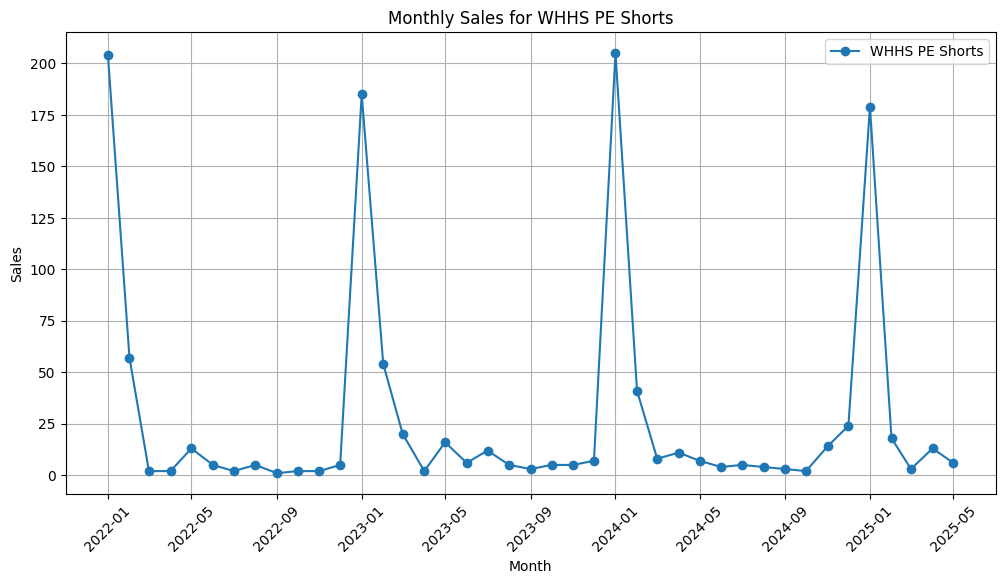

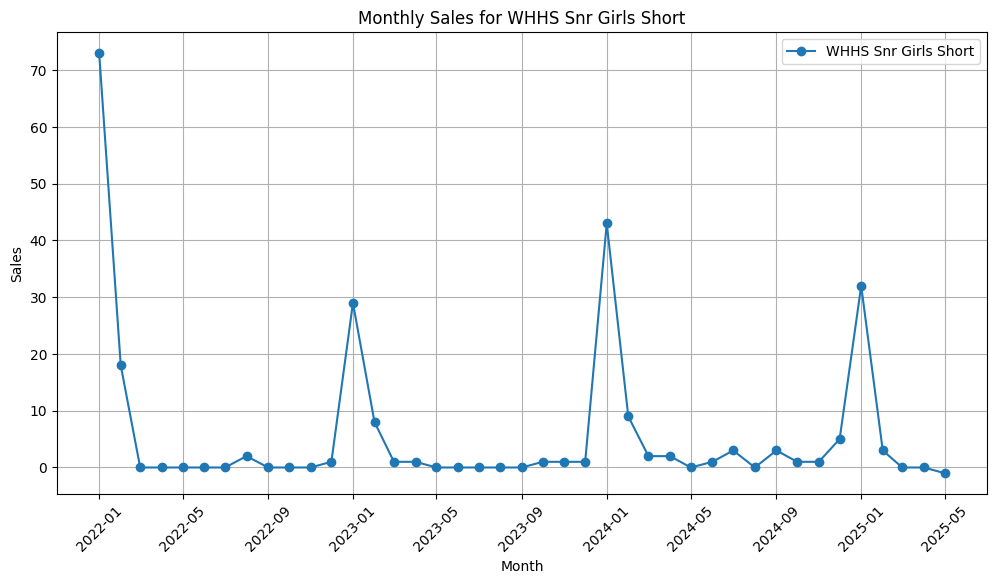

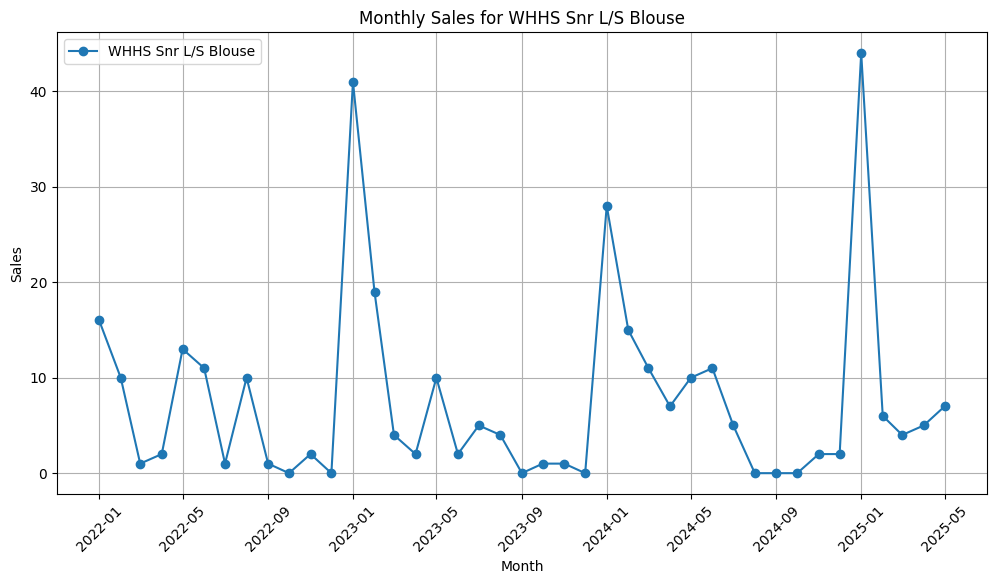

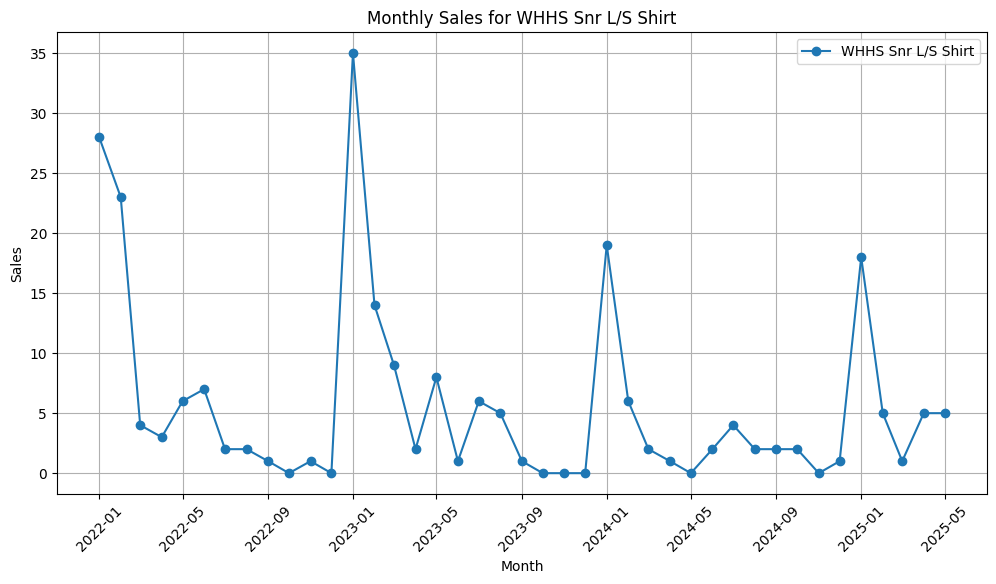

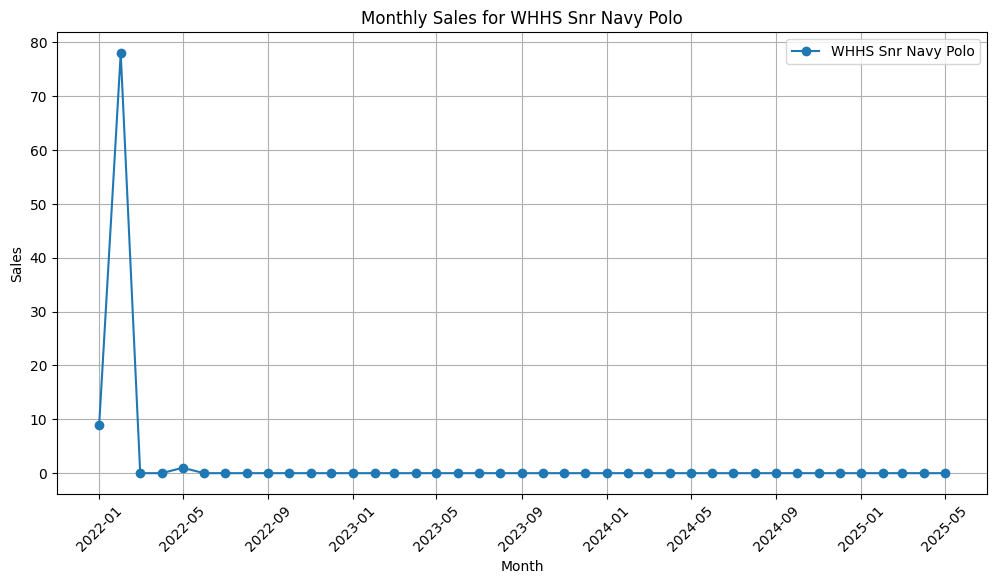

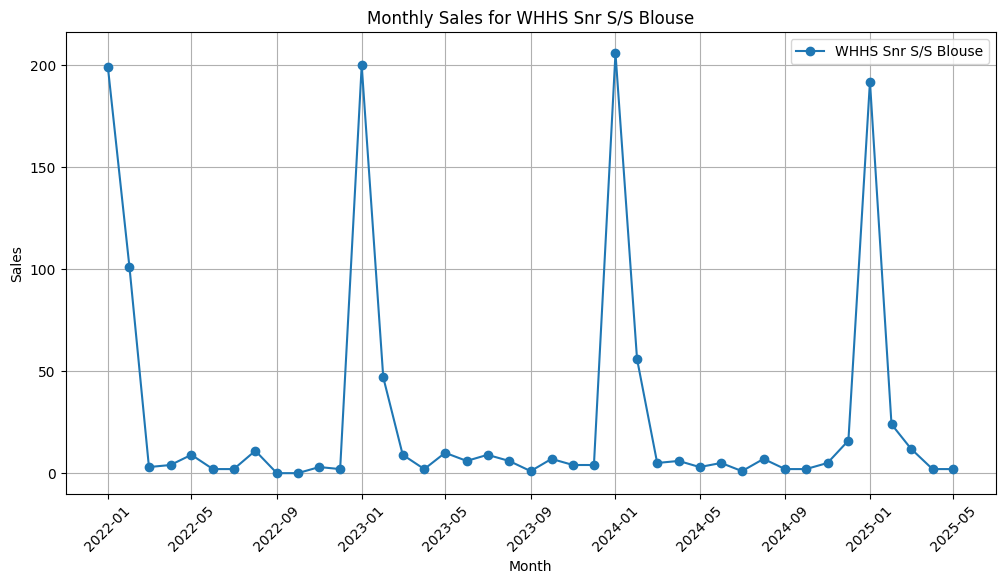

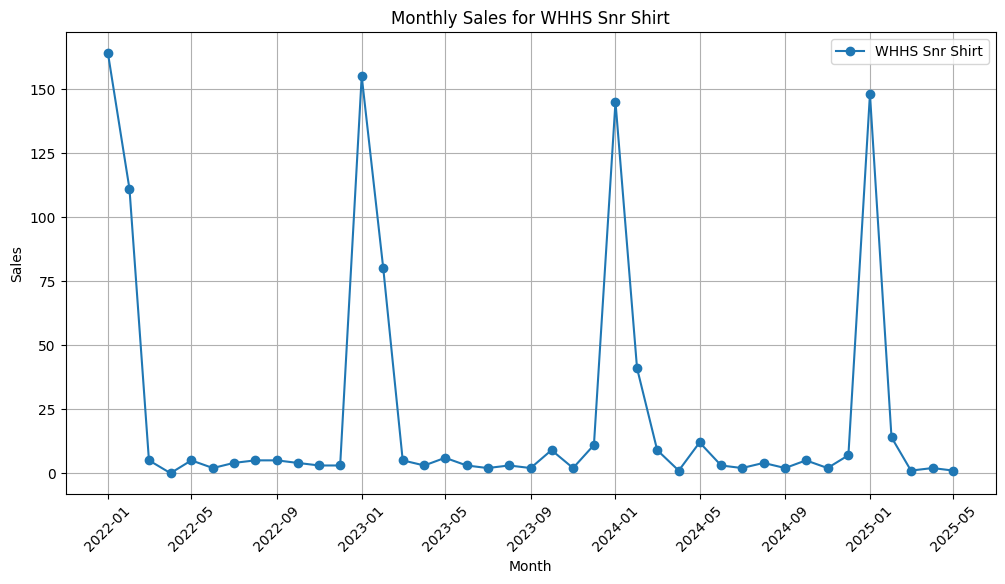

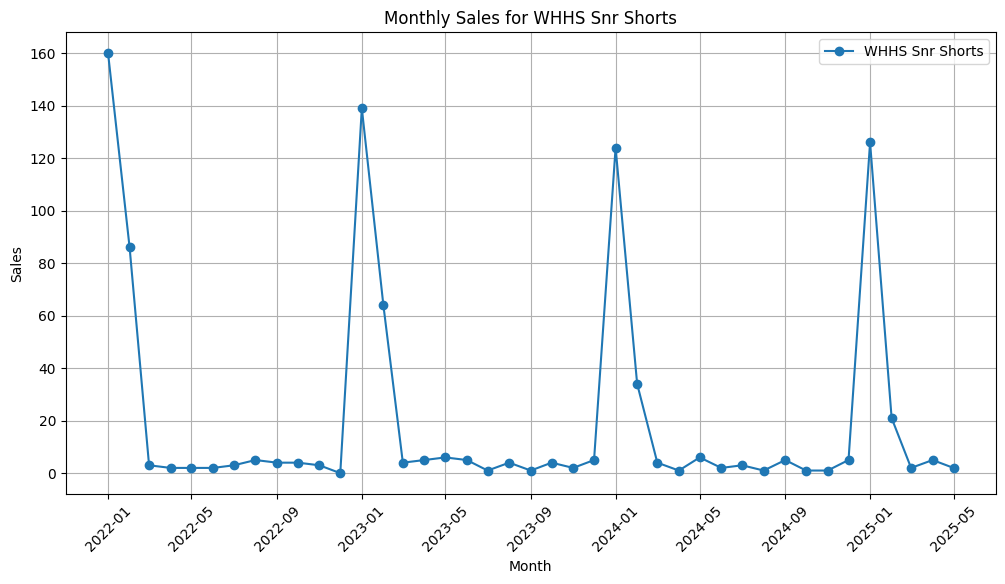

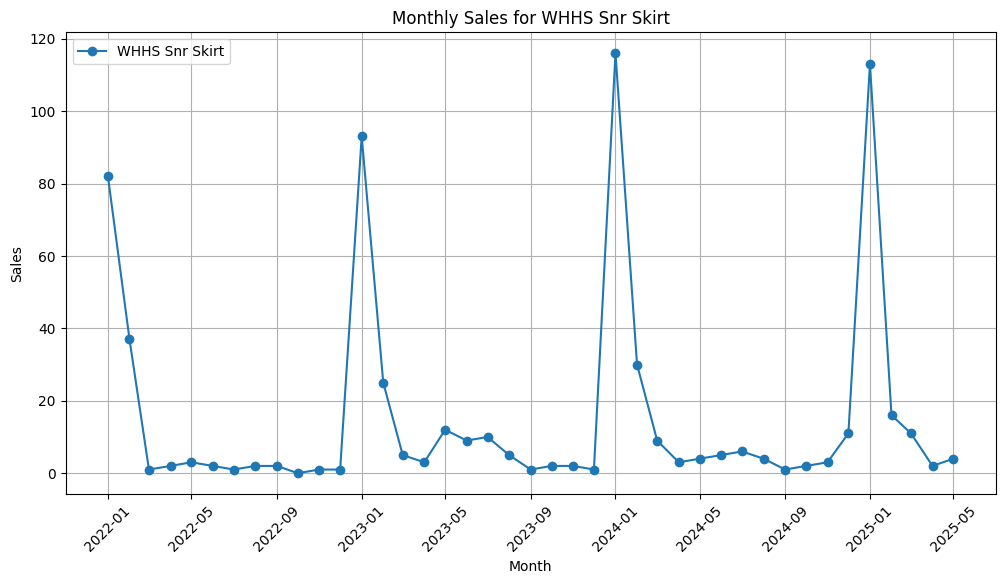

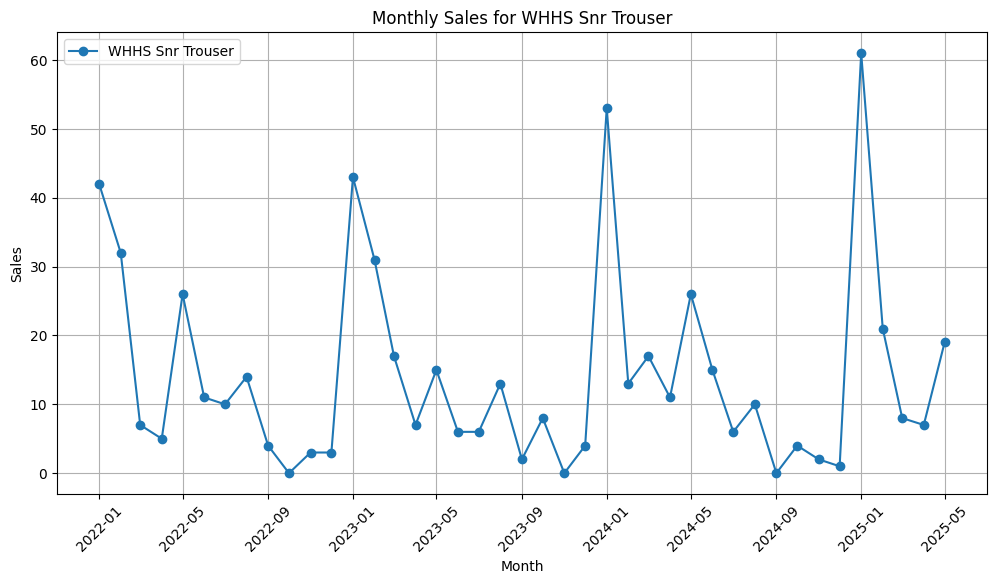

In [18]:
# Aggregate sales by Product and Month
df_product_month = df.groupby(['Product', 'Month'])['Sales'].sum().reset_index()

# Visualize sales of each product for every month
unique_products = df_product_month['Product'].unique()

for product in unique_products:
    plt.figure(figsize=(12, 6))
    product_sales = df_product_month[df_product_month['Product'] == product]
    plt.plot(product_sales['Month'], product_sales['Sales'], marker='o', label=product)
    plt.title(f'Monthly Sales for {product}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

---